# Kruskal Wallis Medians

In [5]:
from scipy import stats            
import os 
import pandas as pd
import numpy as np

In [2]:
og_path = "/Users/aartheebaskaran/Documents/Fiber_Project/Stat Analysis"
os.chdir(og_path)

### Parsing through folders, assigning the core minFD raw values to each group

In [3]:
folder_list = os.listdir()          #https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
del folder_list[0]

d = {}

for i in range(0, len(folder_list)): 
    folder = folder_list[i]
    path = og_path + "/" + folder
    os.chdir(path)
    data = pd.read_csv("core_minFD_Raw.csv")
    data = data.iloc[:,1]
    data = data.tolist()
    d[format(folder)] = data

In [4]:
x = []
for key in d.keys():
    x.append(d[key])

In [21]:
 #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
stats.kruskal(x[0], x[1], x[2], x[3], x[4])

KruskalResult(statistic=0.9278923226611346, pvalue=0.33541120325220136)

In [6]:
np.median(x[0], axis = 0), np.median(x[1], axis = 0), np.median(x[2], axis = 0), np.median(x[3], axis = 0), np.median(x[4], axis = 0)

(28.84836543, 28.50342812, 31.061554805, 27.200076815000003, 27.495641555)

# Ratio of outer vs core - change this so its median not length

In [7]:
og_path = "/Users/aartheebaskaran/Documents/Fiber_Project/Stat Analysis"
os.chdir(og_path)

folder_list = os.listdir()          #https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
del folder_list[0]

core = {}
outer = {}

for i in range(0, len(folder_list)): 
    folder = folder_list[i]
    path = og_path + "/" + folder
    os.chdir(path)
    
    data = pd.read_csv("core_minFD_Raw.csv")
    length_core = len(data)
    core[format(folder)] = length_core
    
    data2 = pd.read_csv("outer_minFD_Raw.csv")
    length_outer = len(data2)
    outer[format(folder)] = length_outer

In [8]:
core_list = []
for key in core.keys():
    core_list.append(core[key])

In [9]:
outer_list = []
for key in outer.keys():
    outer_list.append(outer[key])

In [10]:
len(core_list)

5

In [11]:
# Ratio of core to outer fiber count of each image
ratio = [] 
for i in range(0, len(core_list)):
    ratio.append(core_list[i]/outer_list[i])
    print(ratio[i])

0.33494957331264547
0.4255443234836703
0.29462738301559793
0.5872050595962053
0.4537357743691242


In [16]:
len(ratio)

5

In [19]:
stats.kruskal(ratio[0], ratio[1], ratio[2], ratio[3], ratio[4])

SyntaxError: unmatched ')' (<ipython-input-19-dc3c5e6e75c6>, line 1)

# Function for creating names

In [51]:
def short_name(folder):
    
    name = ""
    
    for i in range(0, len(folder)):
        while folder[i] != " ":
            name = name + (folder[i])
        first_space = i
        break
    
    name = name + " "
    
    for j in range(first_space+1, len(folder)):
        if folder[j].isdigit():
            name  = name + folder[j]
        if folder[j-1].isdigit(): 
            sec_break = j
            break
            
    for k in range(sec_break, sec_break+4):
        name = name + folder[k]

    return name 

In [52]:
print(short_name(folder))

KeyboardInterrupt: 

# Variability between different treatment groups

## Getting list of values for HyA

In [6]:
import os

og_path = "/Users/aartheebaskaran/Documents/Fiber_Project/Stat_Analysis/HyA_analysis"
os.chdir(og_path)

In [7]:
group_list = os.listdir()          #https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

groups = {}

for i in range(0, len(group_list)): 
    group = group_list[i]
    if group != ".DS_Store":
        path = og_path + "/" + group
        os.chdir(path)
        data = pd.read_csv("minFD_Raw.csv")
        data = data.iloc[:,2]
        data = data.tolist()
        groups[format(group)] = data

In [8]:
HyA = []
for key in groups.keys():
    HyA.append(groups[key])

## Check medians for each sample

In [9]:
import statistics

HyA_meds = {}

for i in range(0, len(HyA)):
    med = statistics.median(HyA[i])
    print("HyA " + str(i) + ": " + str(med))
    name = "HyA " + str(i)
    HyA_meds[format(name)] = med

HyA 0: 37.83427017929648
HyA 1: 29.2164561542736
HyA 2: 32.58473117707672
HyA 3: 28.55179946686633
HyA 4: 29.163325558586166
HyA 5: 27.27185542570669


In [10]:
HyA_meds2 = []
for key in HyA_meds.keys():
    HyA_meds2.append(HyA_meds[key])

In [11]:
HyA_meds2

[37.83427017929648,
 29.2164561542736,
 32.58473117707672,
 28.55179946686633,
 29.163325558586166,
 27.27185542570669]

In [12]:
statistics.median(HyA_meds2)

29.189890856429884

## Getting list of values for TEMR

In [13]:
import os

og_path = "/Users/aartheebaskaran/Documents/Fiber_Project/Stat_Analysis/TEMR analysis"
os.chdir(og_path)

In [14]:
group_list = os.listdir()          #https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

groups = {}

for i in range(0, len(group_list)): 
    group = group_list[i]
    if group != ".DS_Store":
        path = og_path + "/" + group
        os.chdir(path)
        data = pd.read_csv("core_minFD_Raw.csv")
        data = data.iloc[:,1]
        data = data.tolist()
        groups[format(group)] = data

In [15]:
TEMR = []
for key in groups.keys():
    TEMR.append(groups[key])

## Check medians of each sample

In [16]:
import statistics

TEMR_meds = {}

for i in range(0, len(TEMR)):
    med = statistics.median(TEMR[i])
    print("TEMR " + str(i) + ": " + str(med))
    name = "TEMR " + str(i)
    TEMR_meds[format(name)] = med

TEMR 0: 28.84836543
TEMR 1: 28.50342812
TEMR 2: 31.061554805
TEMR 3: 27.200076815000003
TEMR 4: 27.495641555


In [17]:
TEMR_meds2 = []
for key in TEMR_meds.keys():
    TEMR_meds2.append(TEMR_meds[key])

## Kruskal Wallis Median Test

In [18]:
stats.kruskal(HyA_meds2, TEMR_meds2)

KruskalResult(statistic=1.63333333333334, pvalue=0.2012426209577194)

In [19]:
total = [HyA_meds2, TEMR_meds2]

In [23]:
os.chdir("/Users/aartheebaskaran/Documents/Fiber_Project/Stat_Analysis")

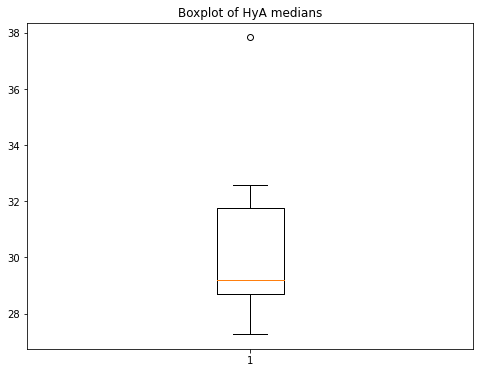

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(HyA_meds2)
plt.title("Boxplot of HyA medians")
plt.savefig("Boxplot of HyA medians", transparent = False)
plt.show()

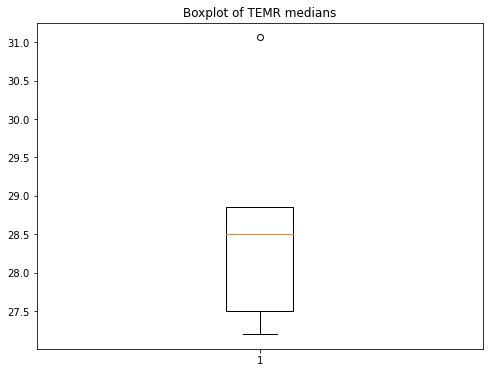

In [32]:
plt.figure(figsize=(8,6))
plt.boxplot(TEMR_meds2)
plt.title("Boxplot of TEMR medians")
plt.savefig("Boxplot of TEMR medians", transparent = False)
plt.show()

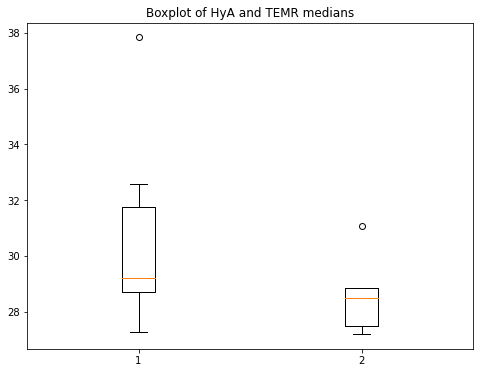

In [36]:
plt.figure(figsize=(8,6))
plt.boxplot(total)
plt.title("Boxplot of HyA and TEMR medians")
plt.savefig("Boxplot of HyA and TEMR medians", transparent = False)
plt.show()

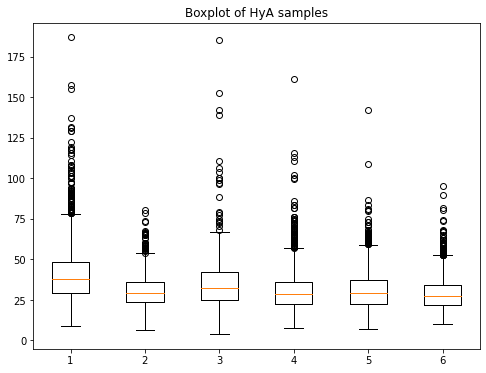

In [34]:
plt.figure(figsize=(8,6))
plt.boxplot(HyA)
plt.title("Boxplot of HyA samples")
plt.savefig("Boxplot of HyA samples", transparent = False)
plt.show()

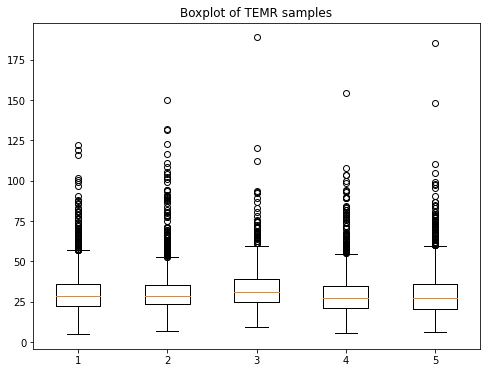

In [35]:
plt.figure(figsize=(8,6))
plt.boxplot(TEMR)
plt.title("Boxplot of TEMR samples")
plt.savefig("Boxplot of TEMR samples", transparent = False)
plt.show()